In [1]:
import sklearn.metrics
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

%matplotlib inline

# Стандартные метрики классификации

In [2]:
iris_data = load_iris()

In [3]:
pred = LogisticRegression().fit(iris_data.data, iris_data.target).predict(iris_data.data)

### Accuracy

- Accuracy - доля объектов, в которых предсказанный класс совпал с реальным

- Можно интерпретировать как вероятность правильно предсказать класс на случайно выбранном объекте

- Не репрезентативна при несбалансированных классах

In [4]:
sklearn.metrics.accuracy_score(iris_data.target, pred)

0.95999999999999996

### Precision

- Precision - количество правильно предсказанных объектов класса делённое на количество  объектов, которым этот класс был предсказан

- Можно интепретировать как вероятность того, что объект, отнесённый моделью к классу, окажется объектом этого класса.

- С точки зрения вероятности precision это $P(y = c \mid a(x) = c)$

In [5]:
sklearn.metrics.precision_score(iris_data.target, pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [10]:
sklearn.metrics.precision_score(iris_data.target, pred, average=micro)

NameError: name 'micro' is not defined

### Recall

- Recall - количество правильно предсказанных объектов класса делённое на количество  объектов этого класса

- Можно интепретировать как вероятность того, что объект  класса будет отнесён моделью к этому классу

- С точки зрения вероятности recall это $P(a(x) = с \mid y = с)$

In [11]:
sklearn.metrics.recall_score(iris_data.target, pred, average=None)

array([ 1.  ,  0.9 ,  0.98])

### F1 мера

- $f_1$ мера - способ скомбинировать recall и precision в одну метрику

- $f_1 = \frac{2~precsion~recall}{precision~+~recall}$

- Является средним гармоническим - $\frac{2}{f_1} = \frac{1}{precision} + \frac{1}{recall}$

- Имеет обобщение для учёта важности precision и recall $\frac{1 + \beta^2}{f_{\beta}} = \frac{1}{precision} + \frac{\beta^2}{recall} \implies f_{\beta} = \frac{(1+\beta^2)~precsion~recall}{\beta^2 precision~+~recall}$ 


In [12]:
sklearn.metrics.f1_score(iris_data.target, pred, average=None)

array([ 1.        ,  0.9375    ,  0.94230769])

In [13]:
sklearn.metrics.fbeta_score(iris_data.target, pred, beta=1, average=None)

array([ 1.        ,  0.9375    ,  0.94230769])

In [14]:
sklearn.metrics.fbeta_score(iris_data.target, pred, beta=2, average=None)

array([ 1.        ,  0.91463415,  0.96456693])

Быстрый способ посмотреть сразу на все эти метрики - функция classification_report

(Прим.) support - количество объектов данного класса

In [15]:
print(sklearn.metrics.classification_report(iris_data.target, pred, digits=4))

             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        50
          1     0.9783    0.9000    0.9375        50
          2     0.9074    0.9800    0.9423        50

avg / total     0.9619    0.9600    0.9599       150



Довольно часто алгоритм выдаёт не просто метку класса, а вероятность / меру уверенности в классификации объекта, выставляя различные пороги для классов, мы получим не одну точку (precision, recall), а целый набор точек.

Тогда информативен совместный график precision-recall-threshold

Получить его можно при помощи функции precision_recall_curve

In [16]:
probas = LogisticRegression().fit(iris_data.data, iris_data.target).predict_proba(iris_data.data)

In [17]:
probas[:10, :]

array([[  8.79681649e-01,   1.20307538e-01,   1.08131372e-05],
       [  7.99706325e-01,   2.00263292e-01,   3.03825365e-05],
       [  8.53796795e-01,   1.46177302e-01,   2.59031285e-05],
       [  8.25383127e-01,   1.74558937e-01,   5.79356669e-05],
       [  8.97323628e-01,   1.02665167e-01,   1.12050036e-05],
       [  9.26986574e-01,   7.30004562e-02,   1.29693872e-05],
       [  8.95064974e-01,   1.04895775e-01,   3.92506205e-05],
       [  8.61839691e-01,   1.38141399e-01,   1.89095833e-05],
       [  8.03156719e-01,   1.96758495e-01,   8.47861140e-05],
       [  7.95421554e-01,   2.04552763e-01,   2.56832240e-05]])

In [18]:
sklearn.metrics.precision_recall_curve(iris_data.target, probas)

ValueError: bad input shape (150, 3)

Используем dataset с бинарным target-ом

In [19]:
cancer_data = load_breast_cancer()

In [20]:
probas = LogisticRegression().fit(cancer_data.data, cancer_data.target).predict_proba(cancer_data.data)

In [21]:
probas[:10]

array([[  1.00000000e+00,   2.02567361e-15],
       [  9.99999982e-01,   1.82611425e-08],
       [  9.99999964e-01,   3.63034395e-08],
       [  4.76268190e-01,   5.23731810e-01],
       [  9.99992076e-01,   7.92435778e-06],
       [  8.02546761e-01,   1.97453239e-01],
       [  9.99999170e-01,   8.29651726e-07],
       [  9.82435493e-01,   1.75645074e-02],
       [  9.12230107e-01,   8.77698932e-02],
       [  9.97135274e-01,   2.86472627e-03]])

In [22]:
sklearn.metrics.precision_recall_curve(cancer_data.target, probas)

ValueError: bad input shape (569, 2)

In [23]:
precision, recall, threshold = sklearn.metrics.precision_recall_curve(cancer_data.target, probas[:, 1])

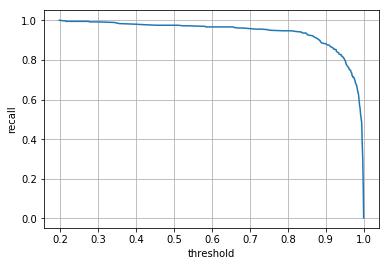

In [24]:
plt.xlabel('threshold')
plt.ylabel('recall')
plt.plot(threshold, recall[:-1])
plt.grid()
plt.show()

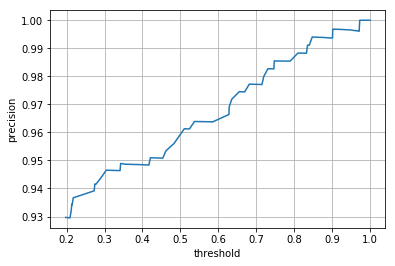

In [25]:
plt.xlabel('threshold')
plt.ylabel('precision')
plt.plot(threshold, precision[:-1])
plt.grid()
plt.show()

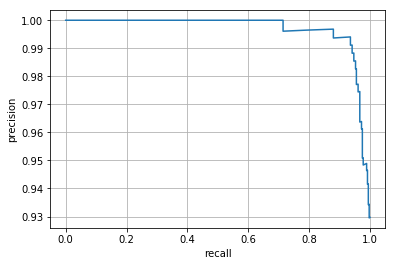

In [26]:
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(recall, precision)
plt.grid()
plt.show()

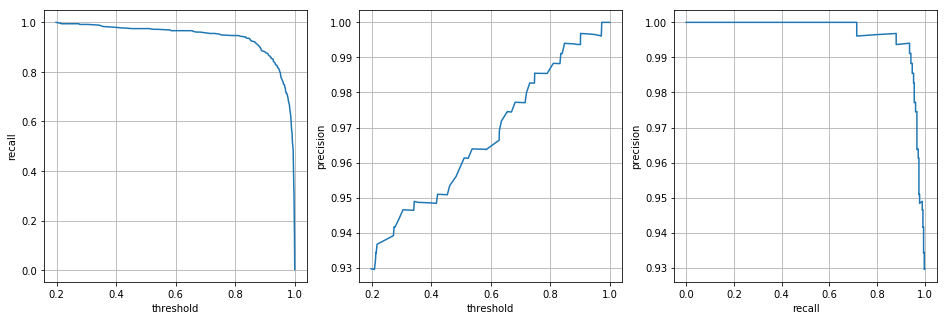

In [27]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.xlabel('threshold')
plt.ylabel('recall')
plt.plot(threshold, recall[:-1])
plt.grid()

plt.subplot(1, 3, 2)
plt.xlabel('threshold')
plt.ylabel('precision')
plt.plot(threshold, precision[:-1])
plt.grid()

plt.subplot(1, 3, 3)
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(recall, precision)
plt.grid()

plt.show()

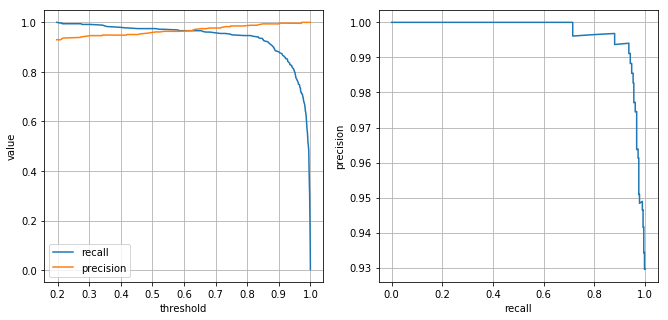

In [28]:
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.xlabel('threshold')
plt.ylabel('value')
plt.plot(threshold, recall[:-1])
plt.plot(threshold, precision[:-1])
plt.legend(['recall', 'precision'])
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(recall, precision)
plt.grid()

plt.show()

- Ещё один общепринятый способ скомбинировать precision и recall - подсчитать площадь под precision-recall прямой

- AUC - Area Under Curve, поэтому данную метрику также называют PR AUC

- В sklearn этот метод называется average_precision_score

In [ ]:
sklearn.metrics.average_precision_score(cancer_data.target, probas[:, 1])

### ROC-AUC

Помимо precision-recall кривой так же часто используют roc кривую

Чтобы определить roc кривую нужно ввести дополнительные обозначения:

- TP - True Positive - #$\{a(x) = 1, y = 1\}$

- FP - False Positive - #$\{a(x) = 1, y = 0\}$

- TN - True Negative - #$\{a(x) = 0, y = 0\}$

- FN - False Negative - #$\{a(x) = 0, y = 1\}$

Тогда:

- TPR - True Positive Rate - $\frac{TP}{TP + FN}$

- FPR - False Positive Rate - $\frac{FP}{FP + TN}$

ROC кривая это набор точек $(FPR, TPR)$, полученный варирование порога


**Что такое precsion, recall и accuracy в данных обозначениях?**

In [29]:
sklearn.metrics.confusion_matrix(cancer_data.target, probas[:, 1] > 0.5)

array([[198,  14],
       [  9, 348]])

In [30]:
sklearn.metrics.confusion_matrix(iris_data.target, pred)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

In [31]:
(
    (tp, fp),
    (fn, tn)
) = sklearn.metrics.confusion_matrix(cancer_data.target, probas[:, 1] > 0.5)

In [32]:
tp / (tp + fn), fp / (fp + tn)

(0.95652173913043481, 0.038674033149171269)

In [33]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(cancer_data.target, probas[:, 1])

In [34]:
tpr[fpr <= 0.03867403315].max()

0.96078431372549022

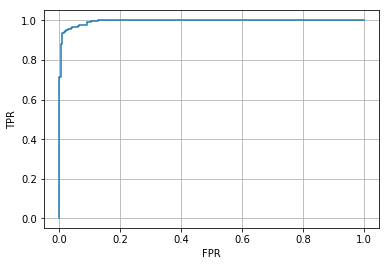

In [35]:
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr)
plt.grid()
plt.show()

- ROC AUC - площадь под данной кривой

- В sklearn считается функцией roc_auc_score

In [36]:
sklearn.metrics.roc_auc_score(cancer_data.target, probas[:, 1])

0.99483378256963162

- **Чему равен ROC AUC случайного предсказания? То есть proba - равномерно распредлённая на отрезке случайная величина**
- **Чему равен ROC AUC константного предсказания?**

In [37]:
sklearn.metrics.roc_auc_score(cancer_data.target, np.zeros_like(cancer_data.target))

0.5

In [38]:
sklearn.metrics.roc_auc_score(cancer_data.target, np.random.uniform(size=len(cancer_data.target)))

0.47222662649965647

### log loss

- Минус логарифм правдоподобия выборки $log loss = -\frac1n \sum\limits_{i=1}^n y_i \log a(x_i) + (1 - y_i) \log (1 - a(x_i))$

In [ ]:
sklearn.metrics.log_loss(cancer_data.target, probas[:, 1])

# Стандартные метрики регрессии

- Общая концепция - $\frac1n \sum\limits_{i=1}^n L(a(x_i), y_i)$

-  MAE - Mean Absolute Error - $\frac1n \sum\limits_{i=1}^n |a(x_i) - y_i|$

- MSE - Mean Squared Error - $\frac1n \sum\limits_{i=1}^n (a(x_i) - y_i)^2$

- MAPE - Mean Absolute Percentage Error - $\frac1n \sum\limits_{i=1}^n \frac{|a(x_i) - y_i|}{y_i}$

- sMAPE - symmetric Mean Absolute Percentage Error - $\frac2n \sum\limits_{i=1}^n \frac{|a(x_i) - y_i|}{a(x_i) + y_i}$

In [ ]:
data = load_diabetes()

In [ ]:
cross_val_score(RandomForestRegressor(), data.data, data.target, cv=3, scoring='neg_mean_absolute_error')

In [ ]:
cross_val_score(RandomForestRegressor(), data.data, data.target, cv=3, scoring='neg_mean_squared_error')

In [ ]:
cross_val_score(RandomForestRegressor(), data.data, data.target, cv=3, scoring='neg_mean_absolute_percentage_error')

In [ ]:
def absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)

In [ ]:
def symmetric_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / (y_true + y_pred))

In [ ]:
cross_val_score(
    RandomForestRegressor(), 
    data.data, data.target, 
    cv=3, 
    scoring=sklearn.metrics.make_scorer(absolute_percentage_error, greater_is_better=False)
)

In [ ]:
cross_val_score(
    RandomForestRegressor(random_state=42), 
    data.data, data.target, 
    cv=3,
    scoring=sklearn.metrics.make_scorer(symmetric_absolute_percentage_error, greater_is_better=False)
)

In [ ]:
def smape_scorer(estimator, X, y):
    pred = estimator.predict(X)
    return - symmetric_absolute_percentage_error(y, pred)

In [ ]:
cross_val_score(
    RandomForestRegressor(random_state=42), 
    data.data, data.target, 
    cv=3, 
    scoring=smape_scorer
)

In [ ]:
cross_validate(
    RandomForestRegressor(random_state=42), 
    data.data, data.target, 
    cv=3, 
    scoring={
        'smape': smape_scorer,
        'mse': sklearn.metrics.make_scorer(sklearn.metrics.mean_squared_error, greater_is_better=False)
    },
    return_train_score=True
)

### Несколько свойств оптимизации метрик регрессии

- $\sum\limits_{i=1}^n \left(a(x_i) - y_i\right)^2 \to \min \implies a(x_i) \approx E(y \mid x = x_i)$

- $\sum\limits_{i=1}^n \left|~a(x_i) - y_i~\right| \to \min \implies a(x_i) \approx median(y \mid x = x_i)$

- $\sum\limits_{i=1}^n \alpha~(a(x_i) - y_i)~I\{a(x_i) \geq y_i\} + (1-\alpha)~(y_i - a(x_i))~I\{a(x_i) < y_i\} \to \min \implies a(x_i) \approx Z_{1 - \alpha}(y \mid x = x_i)$

**Докажите утверждения в случаях, если все $x_i$ одинаковые**

### Как оптимизировать MAPE через оптимизацию MAE?

**Подберите такую функцию $f$, чтобы**

$\sum\limits_{i=1}^n \left|~f(a(x_i)) - f(y_i)~\right| \approx \sum\limits_{i=1}^n \frac{|a(x_i) - y_i|}{y_i}$

Возможно, стоит разложить левую часть в ряд Тейлора